<a href="https://colab.research.google.com/github/jov580/astro-vezbe/blob/main/Magnitude_i_SQL_pretraga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install astroquery

from astroquery.sdss import SDSS

In [36]:
query = """
    SELECT
    objID, ra ,dec
    FROM PhotoPrimary
    WHERE
    ra > 185 and ra < 185.1
    AND dec > 15 and dec < 15.1
   """

results = SDSS.query_sql(query)

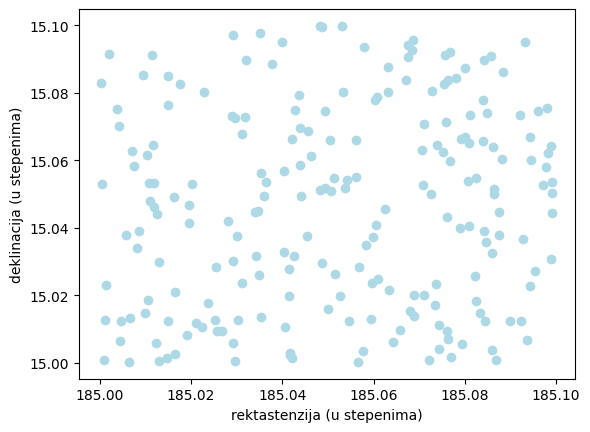

In [37]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('rektastenzija (u stepenima)')
plt.ylabel('deklinacija (u stepenima)')
plt.scatter(results[1][:], results[2][:], color = 'lightblue')
plt.show()

In [38]:
query = """
  SELECT G.objID, GN.distance
  FROM Galaxy as G
  JOIN dbo.fGetNearbyObjEq(185.,-0.5, 1) AS GN
  ON G.objID = GN.objID
  ORDER BY distance
"""

results = SDSS.query_sql(query)

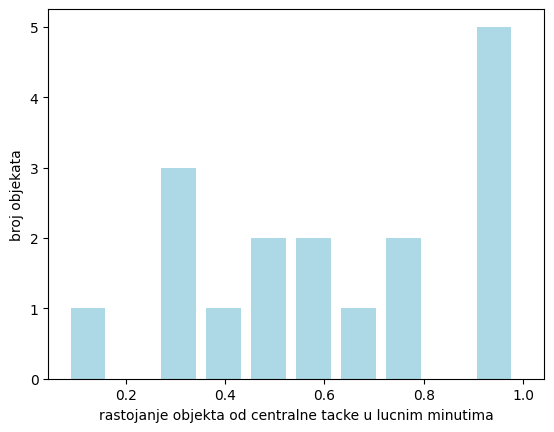

In [39]:
plt.figure()
plt.xlabel('rastojanje objekta od centralne tacke u lucnim minutima')
plt.ylabel('broj objekata')
plt.hist(results[1][:], width = 0.07, color='lightblue')
plt.show()

In [40]:
query = """
  SELECT
    PhotoObj.objID, g, r
FROM
    PhotoObj
JOIN
    dbo.fGetNearbyObjEq(21 + 29.0/60 + 58.0/3600, 12 + 10.0/60, 12) as N ON PhotoObj.objID = N.objID
WHERE
    g BETWEEN 14 AND 24
    AND r BETWEEN 14 AND 24
"""

results = SDSS.query_sql(query)

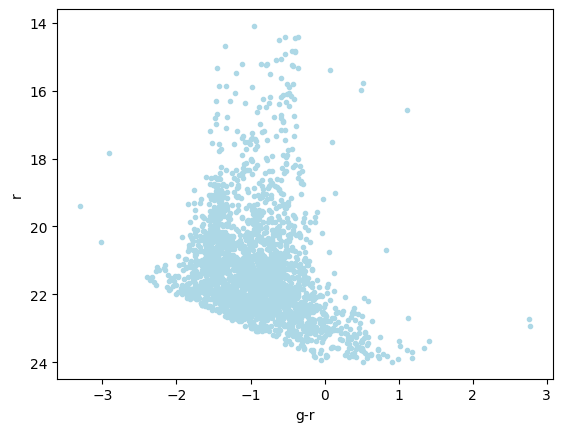

In [41]:
plt.figure()
plt.xlabel('g-r')
plt.ylabel('r')
plt.gca().invert_yaxis()
plt.scatter(results[2][:] - results[1][:], results[2][:], color = 'lightblue', marker = '.')
plt.show()